## Zadanie domowe 2 - Jakub Kuśmierski

### Inicjalizacja śrdowiska programistycznego

In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#Animation libraries
import matplotlib.animation as animation

### Moduł funkcyjny i treningowy

In [24]:
#Data parameters
nPoints = 100
weights = tf.Variable(tf.random.uniform((nPoints, 2), -10, 10), name="p")

#Elipse parameters
epsilon = 0.5
a = 10
f1 = tf.constant([-5.0, 0.0], dtype=tf.float32)
f2 = tf.constant([5.0, 0.0], dtype=tf.float32)
c = epsilon * a
b = np.sqrt(a**2 - c**2)

#Elipse analyticaly
theta = np.linspace(0, 2 * np.pi, 300)  # Kąty od 0 do 2π
x_elipse = a * np.cos(theta)
y_elipse = b * np.sin(theta)

#Loss function
def lossFunction(f1, f2, a, z):
    d1 = tf.sqrt(tf.reduce_sum((z - f1) ** 2, axis=1))
    d2 = tf.sqrt(tf.reduce_sum((z - f2) ** 2, axis=1))
    d = tf.abs(d1 + d2 - 2 * a)
    d = tf.reduce_max(d)
    
    return d

#Gradient descent optimizer

nIterations = 1700
lr = 0.1
loss_history = []
p_history = [weights.numpy()]

for iter in range(nIterations):
    with tf.GradientTape() as tape:
        loss = lossFunction(f1, f2, a, weights)
        gradient = tape.gradient(loss, weights)
    
        weights.assign_sub(lr * gradient)
        loss_history.append(loss.numpy())
        if iter % 10 == 0:
            p_history.append(weights.numpy())

p_history_animation = np.array(p_history)
p_history = np.array(p_history).reshape(-1, 2)


### Moduł do ryswania rysunków

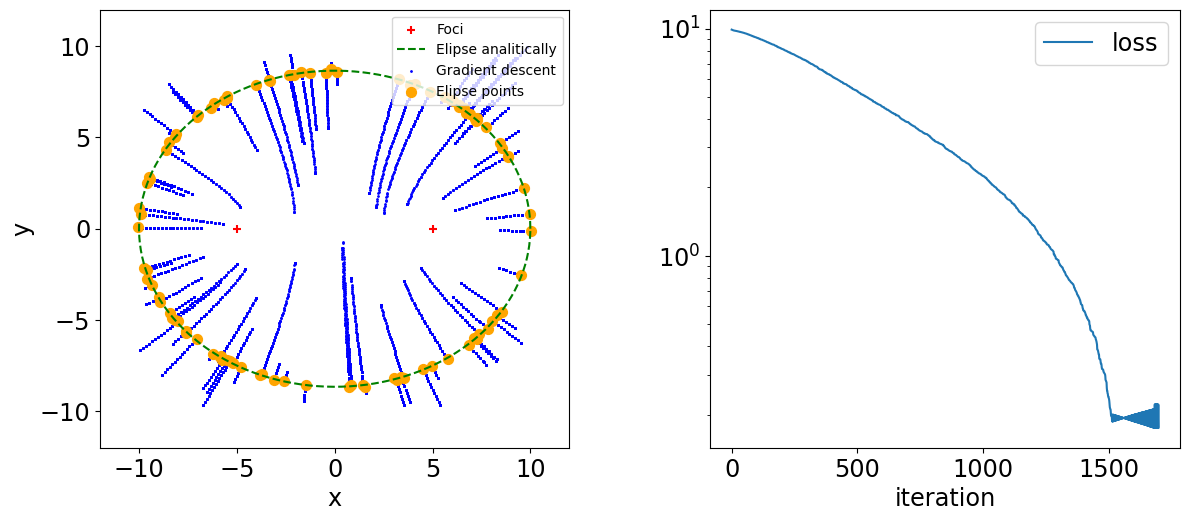

In [25]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

#Plot the elipse
axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='r', marker='+', label='Foci')
axes[0].plot(x_elipse, y_elipse, 'g--', label='Elipse analitically')
axes[0].scatter(p_history[:,0],p_history[:,1], marker='o', color='blue', label='Gradient descent', s=1)
axes[0].scatter(weights[:,0], weights[:,1], color='orange', marker='o', s=50, label='Elipse points')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim( (-12,12))
axes[0].set_ylim( (-12,12))
axes[0].legend(fontsize=10, loc='upper right')

#Plot the loss function
axes[1].plot(loss_history,label="loss")
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('')
axes[1].set_yscale('log')
axes[1].legend()
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

### Twrozenie animcji z wykresów

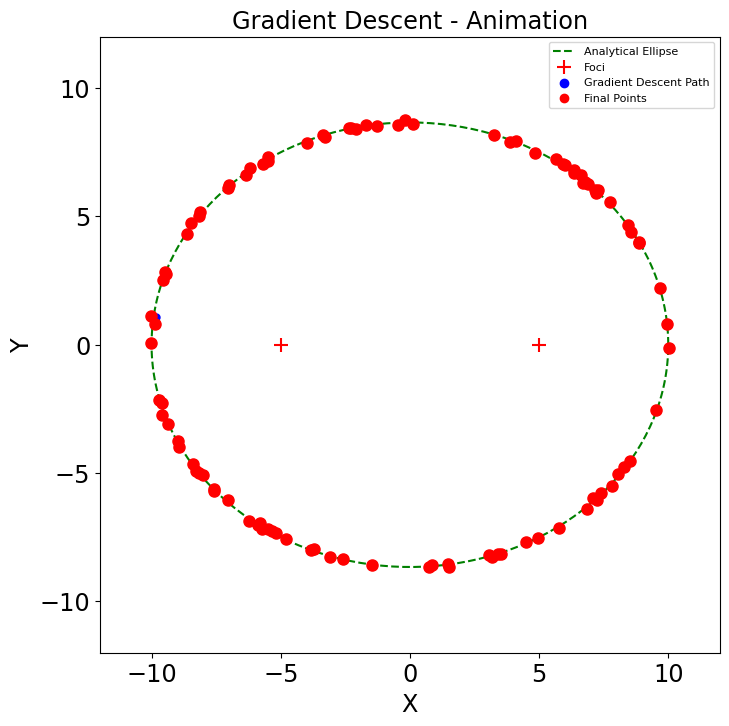

In [26]:
final_frames = 30 
p_history_animation_extended = list(p_history_animation) + [p_history_animation[-1]] * final_frames

fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-12, 12)
axes.set_ylim(-12, 12)
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Gradient Descent - Animation")

axes.plot(x_elipse, y_elipse, 'g--', label="Analytical Ellipse")
axes.scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='+', s=100, label="Foci")
axes.scatter(-100, -100, color='blue', label="Gradient Descent Path")
axes.scatter(-100, -100, color='red', label="Final Points")
axes.legend(fontsize=8, loc='upper right')   

points, = axes.plot([], [], 'bo', markersize=5, label="Gradient Descent Path")  
final_points, = axes.plot([], [], 'ro', markersize=8, label="Final Points")  


def update(frame):
    current_points = p_history_animation_extended[frame]  
    points.set_data(current_points[:, 0], current_points[:, 1])  

    if frame == len(p_history_animation_extended) - final_frames: 
        final_points.set_data(weights.numpy()[:, 0], weights.numpy()[:, 1]) 

    return points, final_points

ani = animation.FuncAnimation(fig, update, frames=len(p_history_animation_extended), interval=50, blit=True)
ani.save("animation.gif", writer="pillow")
